In [115]:
from scipy import stats

In [1]:
from numerov import *

In [2]:
%matplotlib widget

In [3]:
length : float = defaultLength

In [4]:
potentialHeight : float = 1.0

In [5]:
scalar : float = 1.0

In [6]:
lengthRatios : list[float] = [1.0 / 3.0, 2.0 / 3.0, 1.0]

In [7]:
potentialStepHeightRatios : list[float] = [1.0 / 3.0, 2.0 / 3.0, 1.0]

In [8]:
potentialFunction = partial(
        lambda unitLength, unitPotentialHeight, lengthRatios_, potentialStepHeightRatios_, normalizedPositions_ : \
                stairwell(
                        normalizedPositions_ + (1.0 / 2.0), \
                        unitLength, \
                        unitPotentialHeight, \
                        lengthRatios, \
                        potentialStepHeightRatios
                    ), 
        length, 
        potentialHeight, 
        lengthRatios, 
        potentialStepHeightRatios
    )

In [9]:
results = computeWaveFunction(
        potentialFunction, 
        scalingFactor = scalar, 
        length = length
    )

In [10]:
potential : np.array = results["potential"]

In [11]:
waveFunctions : np.ndarray = results["waveFunctions"]

In [12]:
energies : np.array = results["energies"]

In [13]:
normalizedPositions : np.array = results["normalizedPositions"]

In [14]:
probabilityDistributions : np.ndarray = waveFunctions ** 2

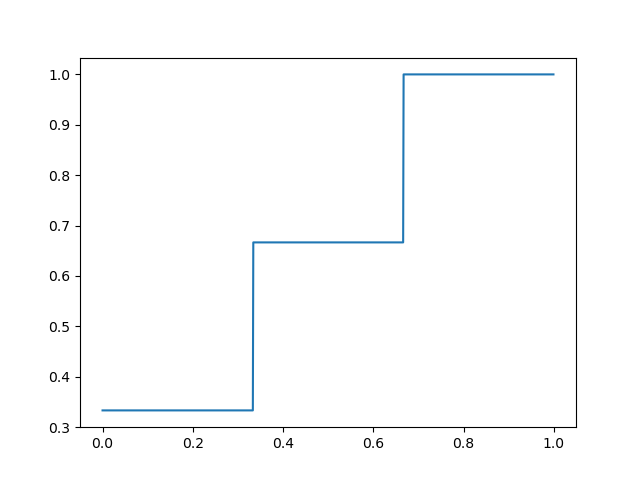

In [28]:
%matplotlib widget
plt.plot(normalizedPositions, potential)

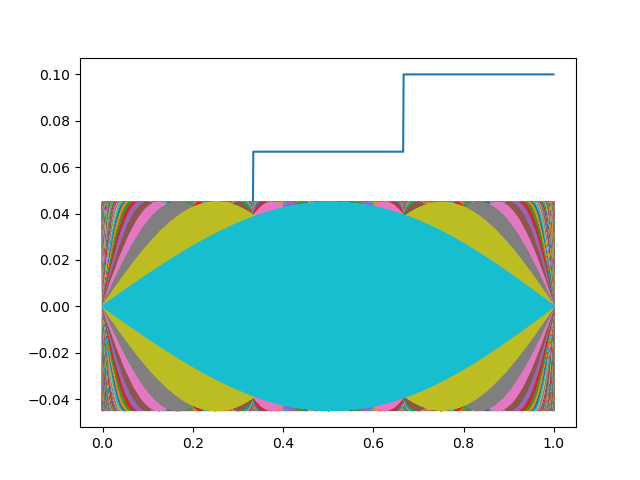

In [27]:
%matplotlib widget
plt.plot(normalizedPositions, potential / scalar / 10)
for waveFunction in waveFunctions:
     plt.plot(normalizedPositions[1:], waveFunction)

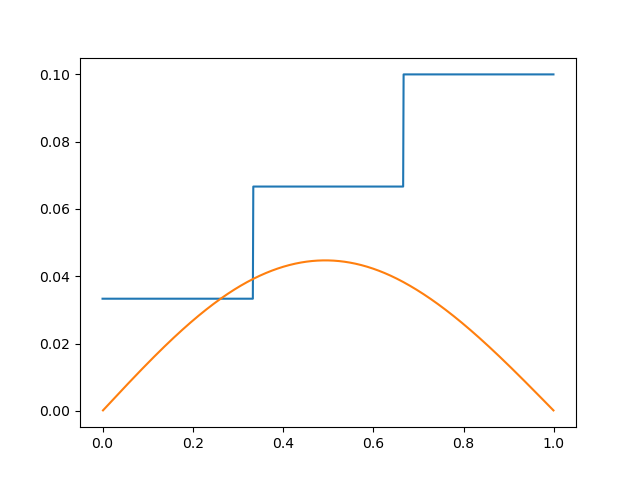

In [147]:
%matplotlib widget
plt.plot(normalizedPositions, potential / scalar / 10)
plt.plot(normalizedPositions[1:], waveFunctions[0])

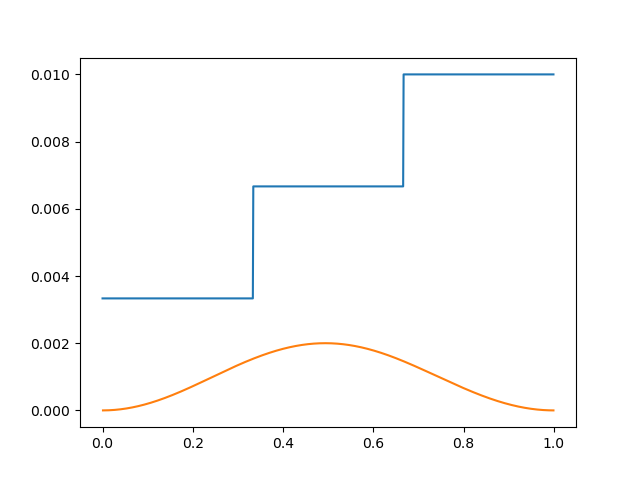

In [148]:
%matplotlib widget
plt.plot(normalizedPositions, potential / scalar / 100)
plt.plot(normalizedPositions[1:], probabilityDistributions[0])

In [37]:
maxValues : np.array = np.array(list(map(np.max, probabilityDistributions)))
expectationValues : np.array = np.array(list(map(lambda distribution : np.sum(distribution * normalizedPositions[1:]), probabilityDistributions)))

In [79]:
mostProbablePositions : np.array = np.array(list(map(
        lambda probabilityDistribution, maxValue : np.sum(np.where(~(probabilityDistribution == maxValue), 0, normalizedPositions[1:])), 
        probabilityDistributions, 
        maxValues
    )))

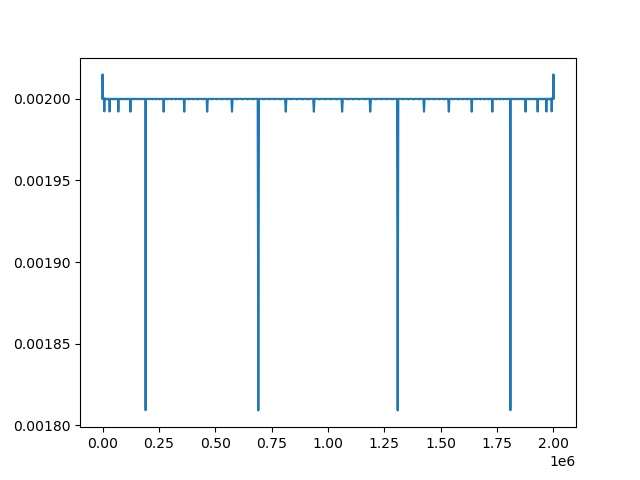

In [41]:
%matplotlib widget
plt.plot(energies, maxValues)

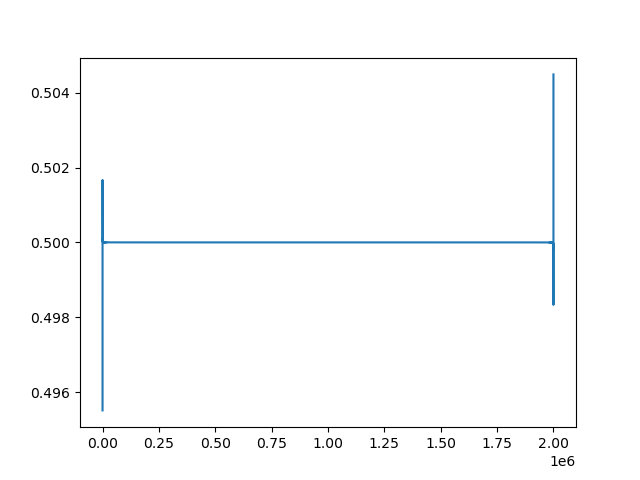

In [142]:
%matplotlib widget
plt.plot(energies, expectationValues)

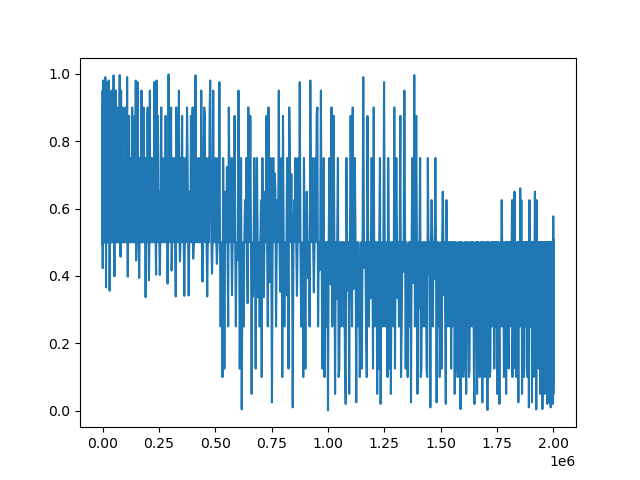

In [80]:
%matplotlib widget
plt.plot(energies, mostProbablePositions)

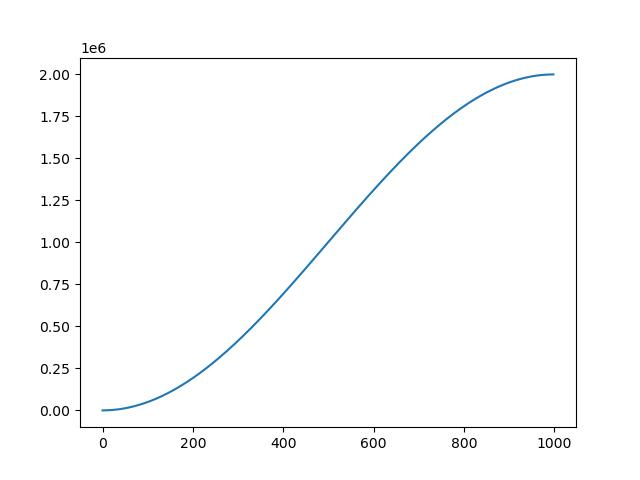

In [29]:
%matplotlib widget
plt.plot(energies)

In [81]:
def binExpectationValuesToRegion(
            expectationValues : np.array, 
            lengthRatios : list, 
            unitLength : float
        ) -> np.array: 
    regionLengths : np.array = np.array([0] + lengthRatios) * unitLength
    expectationRegionBins : np.array = np.zeros(len(energies))
    for ii in range(1, len(regionLengths)): 
            expectationRegionBins = np.where(
                ~((expectationValues < regionLengths[ii]) \
                      & (expectationValues > regionLengths[ii - 1])), 
                expectationRegionBins, 
                ii
            )
    return expectationRegionBins

In [82]:
expectationRegionBins = binExpectationValuesToRegion(expectationValues, lengthRatios, length)

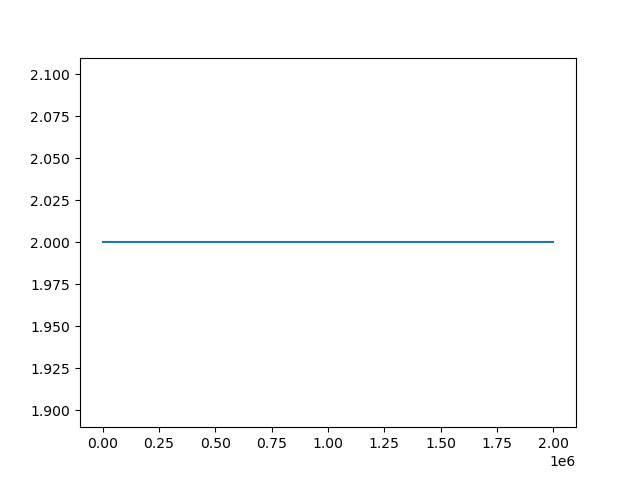

In [89]:
%matplotlib widget
plt.plot(energies, expectationRegionBins)

In [84]:
maxRegionBins = binExpectationValuesToRegion(mostProbablePositions, lengthRatios, length)

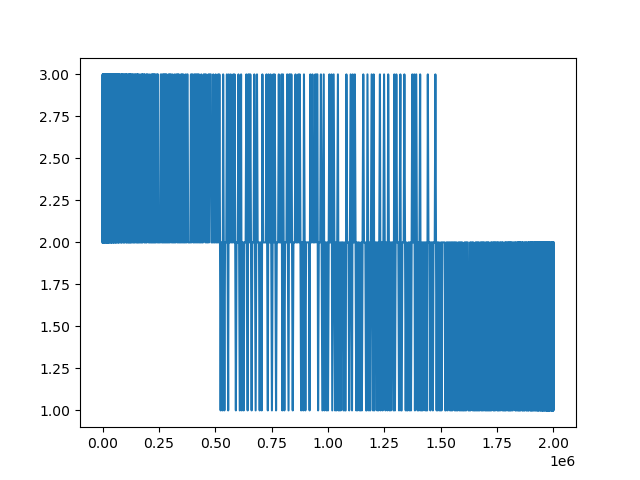

In [90]:
%matplotlib widget
plt.plot(energies, maxRegionBins)

In [94]:
regionPlots : np.ndarray = np.zeros((len(lengthRatios), len(energies)))
for ii, maxRegion in enumerate(maxRegionBins): 
    regionPlots[int(maxRegion) - 1][ii] = mostProbablePositions[ii]

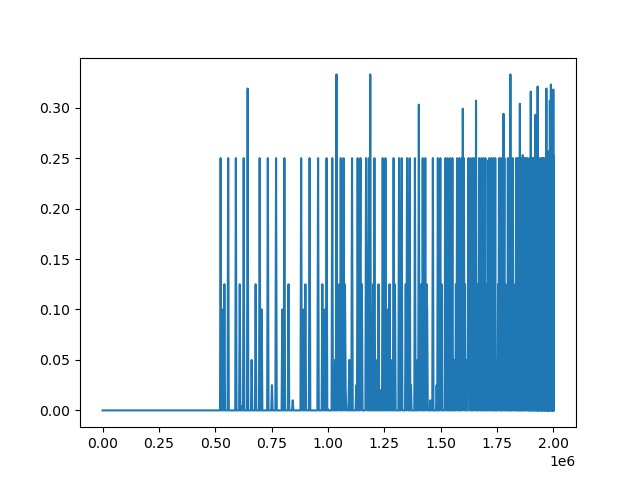

In [95]:
%matplotlib widget
plt.plot(energies, regionPlots[0])

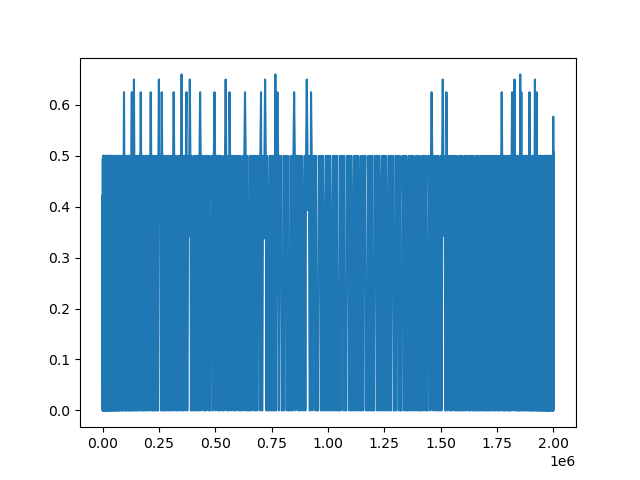

In [96]:
%matplotlib widget
plt.plot(energies, regionPlots[1])

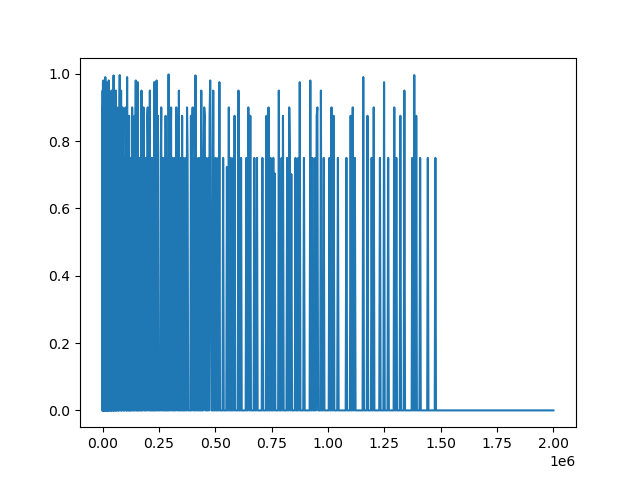

In [97]:
%matplotlib widget
plt.plot(energies, regionPlots[2])

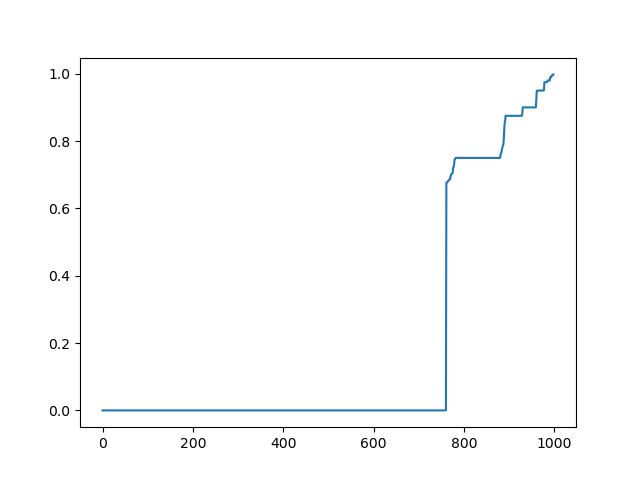

In [100]:
%matplotlib widget
plt.plot(np.sort(regionPlots[2]))

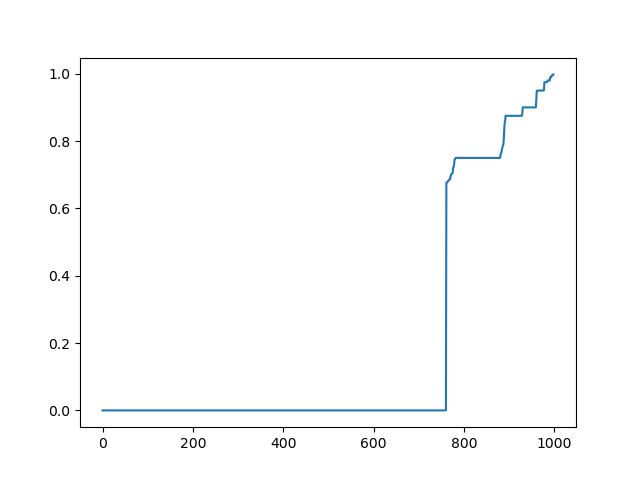

In [102]:
%matplotlib widget
plt.plot(np.sort(regionPlots[2]))

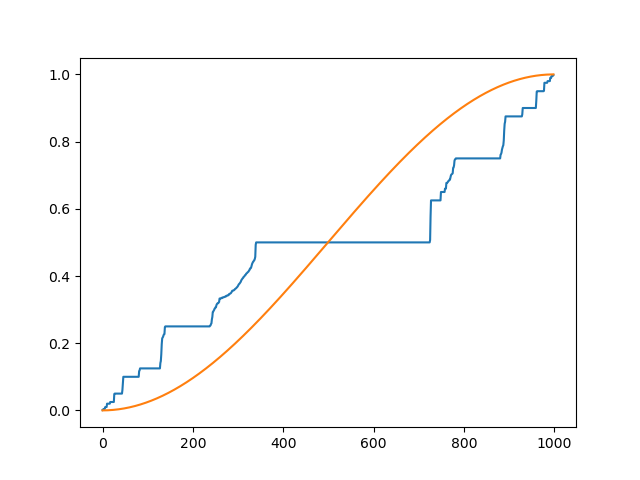

In [113]:
%matplotlib widget
plt.plot(np.sort(mostProbablePositions))
plt.plot(energies / 2e6)

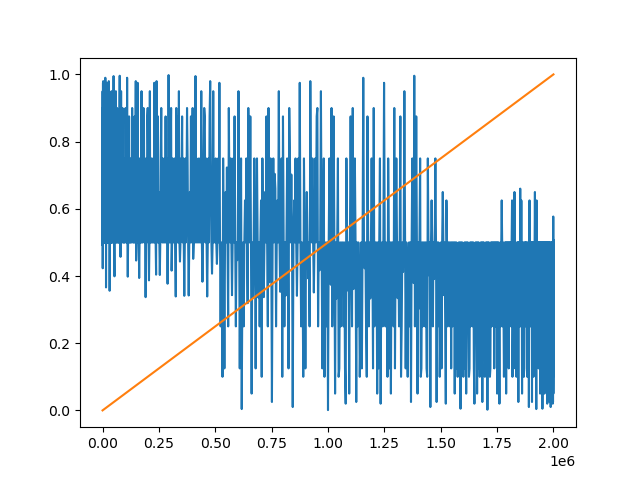

In [114]:
%matplotlib widget
plt.plot(energies, mostProbablePositions)
plt.plot(energies, energies / 2e6)

In [117]:
regression = stats.linregress(mostProbablePositions, energies)

In [118]:
regression

LinregressResult(slope=-1720767.089114631, intercept=1836476.055204385, rvalue=-0.5909450899193738, pvalue=4.249865504988756e-95, stderr=74395.34874189255, intercept_stderr=40421.30217510348)

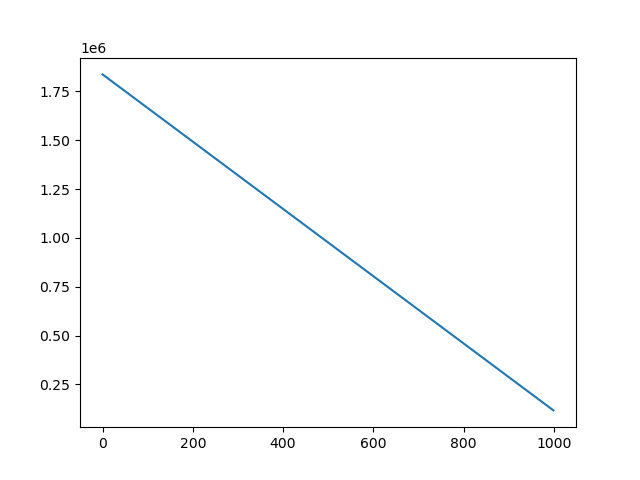

In [120]:
%matplotlib widget
plt.plot(regression.slope * normalizedPositions + regression.intercept)

In [122]:
len(probabilityDistributions)

999

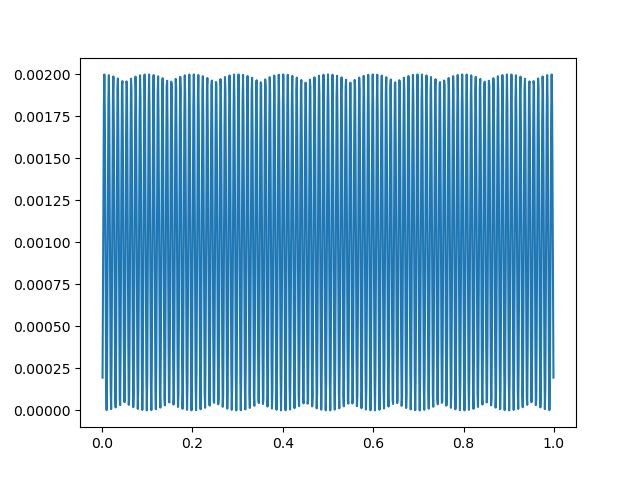

In [138]:
%matplotlib widget
plt.plot(normalizedPositions[1:], probabilityDistributions[100])

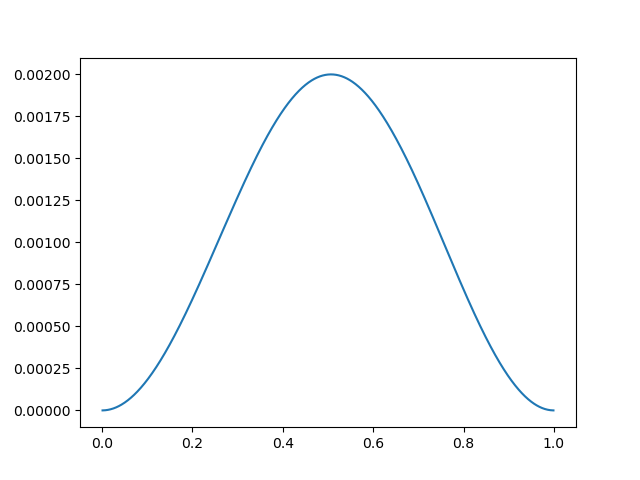

In [139]:
%matplotlib widget
plt.plot(normalizedPositions[1:], probabilityDistributions[998])

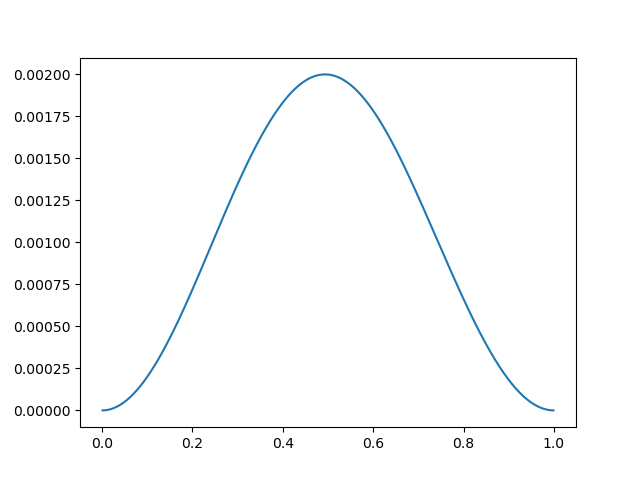

In [141]:
%matplotlib widget
plt.plot(normalizedPositions[1:], probabilityDistributions[0])

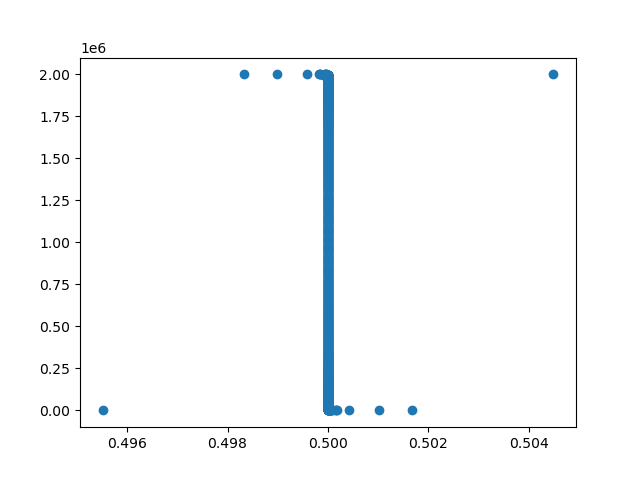

In [146]:
%matplotlib widget
plt.scatter(expectationValues, energies)

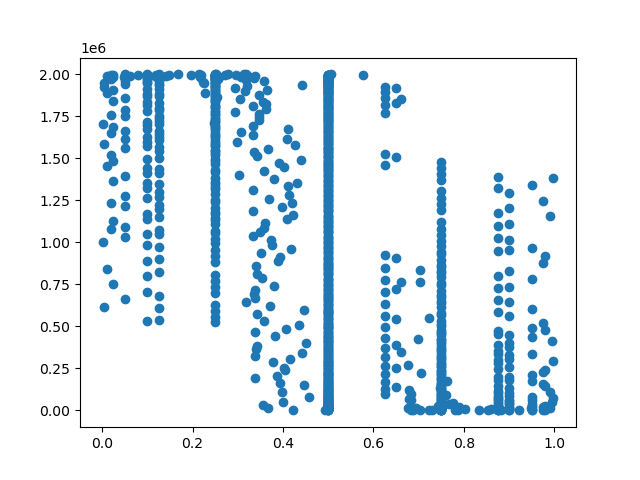

In [145]:
%matplotlib widget
plt.scatter(mostProbablePositions, energies)